<a href="https://colab.research.google.com/github/vivek-varshney/Playground_Series/blob/main/Kaggel_comptition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data/tabular-playground-series-may-2021/train.csv")
df

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,target
0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,3,0,0,21,0,0,0,0,0,0,Class_2
1,1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,3,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Class_1
2,2,0,0,0,0,0,0,0,0,0,2,0,0,1,0,1,0,0,0,0,1,0,5,2,1,1,0,1,0,2,0,0,0,0,19,2,0,1,7,3,0,0,0,1,0,0,0,0,13,2,0,Class_1
3,3,0,0,0,0,0,0,0,3,0,0,0,0,0,1,7,11,1,0,3,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,0,1,0,Class_4
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,9,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,Class_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,0,0,0,1,0,0,0,2,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,5,0,0,0,0,0,0,0,0,1,0,0,6,0,0,3,0,0,0,Class_1
99996,99996,0,0,0,0,0,0,0,1,2,0,0,0,0,0,4,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,2,3,0,1,0,0,0,7,0,0,0,2,0,0,0,10,0,0,0,Class_2
99997,99997,0,0,0,0,0,1,0,0,0,4,0,0,3,0,0,0,0,0,0,1,0,0,0,3,0,0,0,0,4,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,1,0,0,2,0,Class_3
99998,99998,0,0,0,0,1,0,0,0,0,5,0,0,0,0,2,0,0,0,3,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,4,0,Class_2


In [ ]:
df_test = pd.read_csv("/content/drive/MyDrive/data/tabular-playground-series-may-2021/test.csv")
df_test

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,100000,0,0,0,0,0,0,4,4,0,0,5,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,5,0,5,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0
1,100001,0,0,1,0,0,0,2,0,7,7,0,0,0,0,0,3,0,0,2,0,0,0,0,0,0,0,4,0,2,0,0,2,0,3,6,3,0,0,6,0,3,0,1,0,0,0,1,0,2,1
2,100002,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,20,0,0,0,0,4,4,0,0,0,0,0,3,0,0,0,0,0,2,11,0,0,0,0,1,0,0,0,0,6,0
3,100003,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,4,1,0,0,1,0,0,1,1,1,0,0,0,1,4,0,0,0,0,0,0,0,0,0,0,0,0,6,9,14,3
4,100004,0,0,0,0,0,0,1,0,4,0,0,1,0,0,9,0,0,0,0,0,0,3,0,0,0,0,0,0,2,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,149995,0,0,0,0,0,0,0,1,5,0,2,0,0,0,7,5,0,0,0,0,6,1,0,0,7,2,0,0,2,0,0,0,3,0,0,0,0,1,0,1,0,1,0,0,0,3,0,0,3,0
49996,149996,0,0,0,0,0,0,10,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,11,0,0,0,0,1,0,0,0,0,0,3
49997,149997,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,18,0,0,0,0,0,2,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
49998,149998,0,0,0,0,1,0,0,0,0,4,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,6,0,0,1,0,0,0,0,0,0,7,0,1,0,0,0,0,0,0,0,0,1


In [ ]:
output = pd.read_csv("/content/drive/MyDrive/data/tabular-playground-series-may-2021/sample_submission.csv")
output

,id,Class_1,Class_2,Class_3,Class_4
0,100000,0.25,0.25,0.25,0.25
1,100001,0.25,0.25,0.25,0.25
2,100002,0.25,0.25,0.25,0.25
3,100003,0.25,0.25,0.25,0.25
4,100004,0.25,0.25,0.25,0.25
...,...,...,...,...,...
49995,149995,0.25,0.25,0.25,0.25
49996,149996,0.25,0.25,0.25,0.25
49997,149997,0.25,0.25,0.25,0.25
49998,149998,0.25,0.25,0.25,0.25


In [ ]:
df.isnull().value_counts()

id     feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  feature_7  feature_8  feature_9  feature_10  feature_11  feature_12  feature_13  feature_14  feature_15  feature_16  feature_17  feature_18  feature_19  feature_20  feature_21  feature_22  feature_23  feature_24  feature_25  feature_26  feature_27  feature_28  feature_29  feature_30  feature_31  feature_32  feature_33  feature_34  feature_35  feature_36  feature_37  feature_38  feature_39  feature_40  feature_41  feature_42  feature_43  feature_44  feature_45  feature_46  feature_47  feature_48  feature_49  target
False  False      False      False      False      False      False      False      False      False      False      False       False       False       False       False       False       False       False       False       False       False       False       False       False       False       False       False       False       False       False       False       False       False       Fal

In [ ]:
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

In [ ]:
X

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,3,0,0,21,0,0,0,0,0,0
1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,3,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,2,0,0,1,0,1,0,0,0,0,1,0,5,2,1,1,0,1,0,2,0,0,0,0,19,2,0,1,7,3,0,0,0,1,0,0,0,0,13,2,0
3,0,0,0,0,0,0,0,3,0,0,0,0,0,1,7,11,1,0,3,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,9,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,0,0,1,0,0,0,2,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,5,0,0,0,0,0,0,0,0,1,0,0,6,0,0,3,0,0,0
99996,0,0,0,0,0,0,0,1,2,0,0,0,0,0,4,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,2,3,0,1,0,0,0,7,0,0,0,2,0,0,0,10,0,0,0
99997,0,0,0,0,0,1,0,0,0,4,0,0,3,0,0,0,0,0,0,1,0,0,0,3,0,0,0,0,4,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,1,0,0,2,0
99998,0,0,0,0,1,0,0,0,0,5,0,0,0,0,2,0,0,0,3,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,4,0


In [ ]:
y

0        Class_2
1        Class_1
2        Class_1
3        Class_4
4        Class_2
          ...   
99995    Class_1
99996    Class_2
99997    Class_3
99998    Class_2
99999    Class_3
Name: target, Length: 100000, dtype: object

In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
calc_vif(X)

,variables,VIF
0,feature_0,1.070412
1,feature_1,1.045161
2,feature_2,1.045799
3,feature_3,1.092125
4,feature_4,1.043365
5,feature_5,1.064186
6,feature_6,1.088532
7,feature_7,1.180212
8,feature_8,1.062503
9,feature_9,1.203756


In [ ]:
Corr = X.corr()
Corr

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
feature_0,1.000000,0.009409,-0.005150,0.007556,-0.001383,-0.004215,0.004556,0.007358,-0.000675,0.006393,0.006907,0.007015,0.009450,-0.003582,0.006094,0.007553,0.007616,0.009440,0.006877,0.008361,0.003837,0.007138,0.004370,-0.001282,-0.002046,0.001631,0.009368,0.010862,0.003049,0.016042,0.002792,0.001510,0.001304,0.006566,0.001190,-0.000362,0.000328,0.009153,-0.001059,0.009161,0.005561,0.002689,0.000851,0.001722,0.007130,0.011503,0.006370,0.009593,0.005007,0.004884
feature_1,0.009409,1.000000,0.005437,0.004034,0.006808,0.003550,0.010591,0.011225,0.005902,-0.001261,0.008085,0.006465,0.003599,0.007211,0.005782,0.005709,0.009074,0.006018,0.006103,-0.000205,-0.000992,0.007080,0.002815,0.010744,0.003644,0.001341,0.005326,0.006860,0.007804,0.000998,0.008613,0.000712,0.003158,0.006139,0.001437,0.009947,0.004763,0.007054,0.006187,0.002200,0.003197,0.006774,0.000930,0.001485,0.009856,0.001302,0.001621,0.004651,0.003449,0.006846
feature_2,-0.005150,0.005437,1.000000,0.006261,0.001187,0.005621,0.003256,0.007021,0.004419,0.004522,0.005081,0.006261,0.004744,0.015043,-0.000456,-0.003219,0.007392,0.007123,-0.002458,0.001784,-0.001185,0.003438,0.009437,0.002617,0.004296,0.007111,0.013557,0.009699,0.001316,-0.000771,0.016471,0.011857,0.007600,0.009566,0.007673,0.002822,0.005293,0.004852,0.003928,-0.000694,0.002145,0.006023,-0.002452,0.015514,0.009142,-0.003528,0.002532,0.002284,0.003703,0.011090
feature_3,0.007556,0.004034,0.006261,1.000000,0.002121,-0.004890,0.008885,0.009060,0.009984,0.004670,-0.004088,0.004179,0.004630,0.008600,0.004863,0.004184,0.006835,0.005862,0.009474,0.005791,-0.003220,0.010860,-0.000830,0.003751,0.008000,0.006737,0.009419,0.009951,0.003599,0.006460,0.000835,0.010138,0.002545,0.010076,-0.007256,0.011746,0.008499,0.004196,0.004693,0.003695,0.007692,0.005166,0.003764,0.007557,0.002554,0.002937,0.001478,0.005162,-0.005613,0.007009
feature_4,-0.001383,0.006808,0.001187,0.002121,1.000000,0.004858,0.004431,0.009257,0.009862,0.008590,0.002557,0.005939,0.002485,0.004407,-0.002895,-0.005196,0.004223,0.001703,0.000896,-0.002088,0.002343,0.002081,0.003033,0.013443,0.009472,0.006436,0.002958,-0.000507,-0.000657,-0.000767,0.004895,0.009497,0.010221,0.007773,0.009416,0.006505,0.001632,0.003729,0.010565,0.010865,0.007492,0.007644,0.006602,0.003889,-0.000434,-0.000172,0.004466,0.002405,-0.000027,0.006742
feature_5,-0.004215,0.003550,0.005621,-0.004890,0.004858,1.000000,-0.000673,0.009072,-0.001640,0.002708,0.001964,0.004801,-0.000418,0.012390,-0.004013,-0.005147,0.006423,-0.003444,0.004473,0.009713,0.008983,0.001724,0.009612,0.006151,0.010208,0.001893,0.012646,0.008938,0.004464,-0.001518,0.005359,0.004911,0.002347,0.002181,0.005595,0.006214,0.003196,-0.000222,0.003040,0.005288,0.004225,0.005814,0.005704,0.010128,0.007404,0.004852,-0.000432,0.004903,0.006293,0.002617
feature_6,0.004556,0.010591,0.003256,0.008885,0.004431,-0.000673,1.000000,0.009118,0.004583,0.011149,0.002088,0.009379,0.008548,-0.001435,0.004417,0.006050,0.009328,0.006344,0.010410,0.002839,0.002153,0.006453,0.009496,0.007428,0.003615,0.002609,0.001697,0.008088,0.003805,0.003946,0.006231,0.005768,0.000153,0.000595,0.003421,0.000854,0.002574,0.000257,0.006160,-0.000959,0.009792,0.008931,0.002517,0.007941,0.002683,0.009715,0.002535,0.008581,0.004904,0.007396
feature_7,0.007358,0.011225,0.007021,0.009060,0.009257,0.009072,0.009118,1.000000,0.003761,0.001437,0.003886,0.008729,0.011733,0.005950,0.004096,0.001619,0.008498,0.001449,0.003664,0.00759

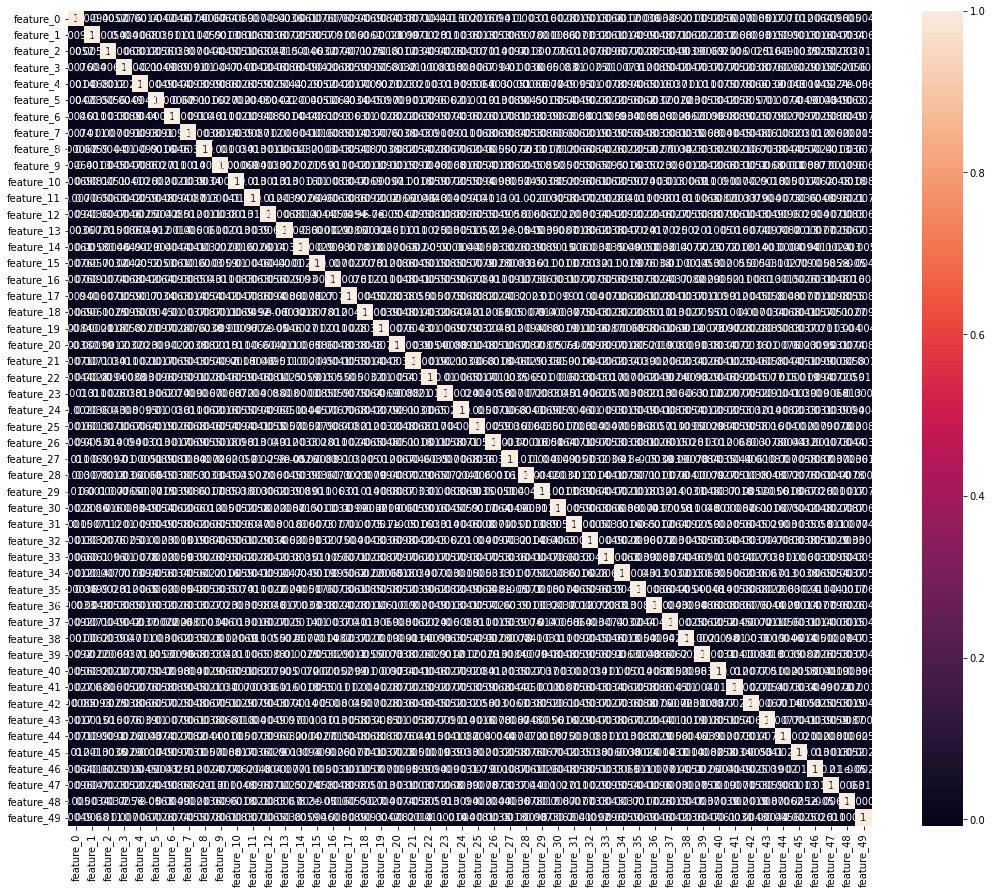

In [ ]:
plt.figure(figsize=(18,15))
sns.heatmap(Corr, annot=True);

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
y

array([1, 0, 0, ..., 2, 1, 2])

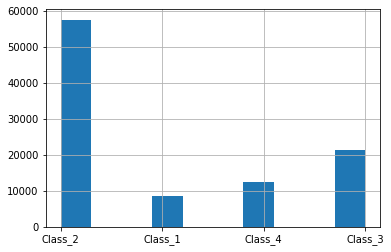

In [ ]:
y.hist();

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 10)

In [ ]:
X_train

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
73663,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,2,0
46694,0,0,0,0,0,0,0,0,0,0,2,1,1,0,5,1,0,0,0,0,0,0,0,0,0,14,0,0,3,0,0,4,0,0,0,1,1,0,2,2,0,1,0,0,0,1,0,0,2,1
12163,0,0,1,0,0,0,0,2,2,0,0,0,1,0,0,2,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3,0,1,1,0,0,1,0,0,0,0,0,2,0
58752,0,1,4,0,0,0,0,0,1,0,0,0,0,2,1,5,0,3,2,10,0,0,1,0,0,0,0,0,0,2,0,1,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0
49821,0,0,0,0,0,0,0,0,0,8,0,0,0,0,1,0,0,1,0,0,0,0,0,3,4,1,0,0,6,0,0,0,1,0,0,0,0,0,1,2,0,1,0,1,0,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9372,0,0,0,1,0,0,0,3,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,4,0,5,0,0,0,0,0,0,0,1,2
93553,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,3,0,0,0,8,25,0
50496,8,0,0,3,0,0,0,0,0,2,0,0,0,0,0,0,1,7,0,6,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,1,14,0,0,0,0,0,0,0,3,0,0,5
94735,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,4,6,0,0,0,0,2,0,0,2,3


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state = 0)
classifier_lr.fit(X_train, y_train)

In [ ]:
train_pred = classifier_lr.predict(X_train)
test_pred = classifier_lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
# On training set
print(confusion_matrix(y_train,train_pred))
print("Accuracy: ", accuracy_score(y_train,train_pred)*100)

In [ ]:
# On test set
print(confusion_matrix(y_test, test_pred))
print("Accuracy: ", accuracy_score(y_test, test_pred)*100)

Naive Bayes


In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
train_pred = classifier_nb.predict(X_train)
test_pred = classifier_nb.predict(X_test)

In [ ]:
# On training set
print(confusion_matrix(y_train,train_pred))
print("Accuracy: ", accuracy_score(y_train,train_pred)*100)

[[  326  2417  1106  2528]
 [ 1901 16662  6602 17939]
 [  678  5752  3441  6148]
 [  321  3075  1328  4776]]
Accuracy:  33.60666666666667


In [ ]:
# On test set
print(confusion_matrix(y_test, test_pred))
print("Accuracy: ", accuracy_score(y_test, test_pred)*100)

[[  85  799  362  867]
 [ 618 5559 2180 6036]
 [ 208 1899 1129 2165]
 [ 105 1030  390 1568]]
Accuracy:  33.364


SVM

In [ ]:
from sklearn.svm import SVC
classifier_svm = SVC(kernel = 'rbf', random_state = 0)
classifier_svm.fit(X_train, y_train)

In [ ]:
train_pred = classifier_svm.predict(X_train)
test_pred = classifier_svm.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
# On training set
print(confusion_matrix(y_train,train_pred))
print("Accuracy: ", accuracy_score(y_train,train_pred)*100)

In [ ]:
# On test set
print(confusion_matrix(y_test, test_pred))
print("Accuracy: ", accuracy_score(y_test, test_pred)*100)

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classfier_rf = RandomForestClassifier(random_state = 10)
classfier_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [ ]:
train_pred = classfier_rf.predict(X_train)
test_pred = classfier_rf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
# On training set
print(confusion_matrix(y_train,train_pred))
print("Accuracy: ", accuracy_score(y_train,train_pred)*100)

[[ 6377     0     0     0]
 [    0 43103     0     1]
 [    0     0 16019     0]
 [    0     1     0  9499]]
Accuracy:  99.99733333333334


In [ ]:
# On test set
print(confusion_matrix(y_test, test_pred))
print("Accuracy: ", accuracy_score(y_test, test_pred)*100)

[[    0  2076    36     1]
 [    2 14179   202    10]
 [    1  5207   192     1]
 [    0  3041    48     4]]
Accuracy:  57.49999999999999


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies  = cross_val_score(classfier_rf, X_train, y_train,cv = 10, n_jobs=-1)
print("Scores:", accuracies)
print("Kfold Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Scores: [0.5752     0.57386667 0.57533333 0.57546667 0.57386667 0.57613333
 0.57546667 0.57506667 0.57586667 0.5756    ]
Kfold Accuracy: 57.52 %
Standard Deviation: 0.07 %


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Create the random grid
random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf':  [1, 2, 4],
               'bootstrap': [True, False]}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Create the random grid
random_grid = {'n_estimators': [500],
               'max_features': ['sqrt'],
               'max_depth': [100],
               'min_samples_split': [10],
               'min_samples_leaf':  [1, 2],
               'bootstrap': [True,False]}

In [ ]:
rf_random = RandomizedSearchCV(estimator = classfier_rf, param_distributions = random_grid,
                               n_iter = 100, cv = 3, verbose=2, random_state=10, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

In [ ]:
best_grid = rf_random.best_params_
best_grid

In [ ]:
classfier_rf = RandomForestClassifier(random_state = 10, n_estimators = 500, min_samples_split = 10,
 min_samples_leaf = 1, max_features = 'sqrt', max_depth = 100, bootstrap = True)
classfier_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [ ]:
train_pred = classfier_rf.predict(X_train)
test_pred = classfier_rf.predict(X_test)

In [ ]:
# On train set
print(confusion_matrix(y_train,train_pred))
print("Accuracy: ", accuracy_score(y_train,train_pred)*100)

[[ 2886  3482     9     0]
 [    0 43104     0     0]
 [    0  2043 13976     0]
 [    0  3712     7  5781]]
Accuracy:  87.66266666666667


In [ ]:
# On test set
print(confusion_matrix(y_test, test_pred))
print("Accuracy: ", accuracy_score(y_test, test_pred)*100)

[[    0  2086    27     0]
 [    0 14286   106     1]
 [    0  5271   129     1]
 [    0  3065    27     1]]
Accuracy:  57.664


Random forest with limited features

with 25 features

<BarContainer object of 50 artists>

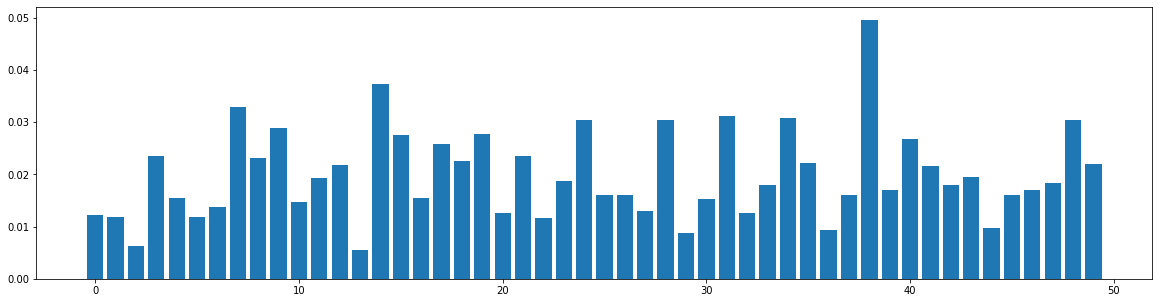

In [ ]:
importance = classfier_rf.feature_importances_
plt.figure(figsize=(20,5))
plt.bar([x for x in range(len(importance))], importance)

In [ ]:
importance

array([0.01222419, 0.01174476, 0.00635553, 0.02345428, 0.01547875,
       0.01175921, 0.01379772, 0.03290746, 0.02311333, 0.02884842,
       0.01474188, 0.01937946, 0.02184344, 0.00554316, 0.037242  ,
       0.02747503, 0.01541583, 0.02580605, 0.02251622, 0.0277707 ,
       0.01255749, 0.02347181, 0.01172484, 0.01881597, 0.03043986,
       0.01608261, 0.01600711, 0.01295643, 0.03049673, 0.00884845,
       0.01528214, 0.0311587 , 0.01250314, 0.01792178, 0.03083964,
       0.02221981, 0.00939891, 0.01605306, 0.0495609 , 0.01704243,
       0.02669632, 0.02163822, 0.01794062, 0.01939499, 0.00975354,
       0.01607484, 0.01697034, 0.0183513 , 0.03038787, 0.02199274])

In [ ]:
features = np.concatenate((X.columns.values.reshape(len(X.columns),1),importance.reshape(len(importance),1)),axis=1)
features = pd.DataFrame(features, columns=['Feature','Score']).sort_values("Score")
features

,Feature,Score
13,feature_13,0.00554316
2,feature_2,0.00635553
29,feature_29,0.00884845
36,feature_36,0.00939891
44,feature_44,0.00975354
22,feature_22,0.0117248
1,feature_1,0.0117448
5,feature_5,0.0117592
0,feature_0,0.0122242
32,feature_32,0.0125031


In [ ]:
top_25 = features.iloc[-25:,:]['Feature'].values
top_25

array(['feature_33', 'feature_23', 'feature_47', 'feature_43',
       'feature_18', 'feature_35', 'feature_12', 'feature_41',
       'feature_49', 'feature_3', 'feature_8', 'feature_21', 'feature_15',
       'feature_17', 'feature_40', 'feature_28', 'feature_9',
       'feature_19', 'feature_24', 'feature_48', 'feature_34',
       'feature_31', 'feature_7', 'feature_14', 'feature_38'],
      dtype=object)

In [ ]:
least_25 = features.iloc[:25,:]['Feature'].values
least_25

array(['feature_13', 'feature_2', 'feature_29', 'feature_36',
       'feature_44', 'feature_22', 'feature_0', 'feature_5', 'feature_1',
       'feature_20', 'feature_32', 'feature_6', 'feature_27',
       'feature_10', 'feature_37', 'feature_16', 'feature_30',
       'feature_25', 'feature_45', 'feature_4', 'feature_26',
       'feature_46', 'feature_42', 'feature_39', 'feature_11'],
      dtype=object)

In [ ]:
X_25 = X[top_25]
X_25['mean_least_25'] = X[least_25].mean(axis = 1)
X_25

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,feature_33,feature_23,feature_47,feature_43,feature_18,feature_35,feature_12,feature_41,feature_49,feature_3,feature_8,feature_21,feature_15,feature_17,feature_40,feature_28,feature_9,feature_19,feature_24,feature_48,feature_34,feature_31,feature_7,feature_14,feature_38,mean_least_25
0,0,0,0,21,0,0,0,0,0,0,0,0,0,6,3,0,0,0,0,0,1,0,0,0,0,0.12
1,0,0,0,0,0,0,0,0,0,0,0,0,3,3,0,0,0,0,0,0,0,0,0,0,0,0.20
2,19,1,13,0,0,0,1,0,0,0,0,5,0,0,0,2,2,1,1,2,2,0,0,1,3,0.48
3,0,0,0,0,3,0,0,0,0,0,0,0,11,0,0,1,0,1,0,1,1,0,3,7,4,0.12
4,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,1,0,2,1,0.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,0,0,6,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,5,2,0,0,0.16
99996,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,1,2,1,4,7,0.60
99997,0,3,0,0,0,0,3,0,0,0,0,0,0,0,0,4,4,1,0,2,0,0,0,0,5,0.08
99998,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,1,5,0,2,4,0,0,0,2,1,0.08


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_25,y, random_state = 10)

In [ ]:
X_train

,feature_33,feature_23,feature_47,feature_43,feature_18,feature_35,feature_12,feature_41,feature_49,feature_3,feature_8,feature_21,feature_15,feature_17,feature_40,feature_28,feature_9,feature_19,feature_24,feature_48,feature_34,feature_31,feature_7,feature_14,feature_38,mean_least_25
73663,0,0,1,0,0,1,0,1,0,0,0,2,1,0,0,0,0,0,0,2,0,0,0,2,0,0.08
46694,0,0,0,0,0,1,1,1,1,0,0,0,1,0,0,3,0,0,0,2,0,4,0,5,2,0.84
12163,0,0,0,0,0,0,1,0,0,0,2,0,2,0,0,0,0,2,0,2,0,1,2,0,1,0.28
58752,0,0,0,0,2,0,0,0,0,0,1,0,5,3,0,0,0,10,0,0,1,1,0,1,1,0.48
49821,0,3,0,1,0,0,0,1,0,0,0,0,0,1,0,6,8,0,4,3,0,0,0,1,1,0.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9372,0,0,0,0,0,1,0,0,2,1,0,0,0,0,5,1,0,0,0,1,0,0,3,2,4,0.04
93553,0,0,8,3,1,1,0,0,0,0,0,0,0,0,0,1,0,0,2,25,1,0,0,2,1,0.04
50496,0,0,0,0,0,0,0,0,5,3,0,0,0,7,0,1,2,6,0,0,0,0,0,0,14,0.60
94735,0,0,0,0,0,0,0,0,3,1,0,0,0,0,6,0,0,0,0,2,1,0,0,1,1,0.44


In [ ]:
classfier_rf = RandomForestClassifier(random_state = 10, n_estimators = 500, min_samples_split = 10,
 min_samples_leaf = 1, max_features = 'sqrt', max_depth = 100, bootstrap = True)
classfier_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [ ]:
train_pred = classfier_rf.predict(X_train)
test_pred = classfier_rf.predict(X_test)

In [ ]:
# On train set
print(confusion_matrix(y_train,train_pred))
print("Accuracy: ", accuracy_score(y_train,train_pred)*100)

[[ 1643  4725     9     0]
 [    0 43104     0     0]
 [    0  3325 12693     1]
 [    0  5305     3  4192]]
Accuracy:  82.176


In [ ]:
# On test set
print(confusion_matrix(y_test, test_pred))
print("Accuracy: ", accuracy_score(y_test, test_pred)*100)

[[    0  2105     8     0]
 [    0 14351    40     2]
 [    0  5369    31     1]
 [    0  3080     9     4]]
Accuracy:  57.544


top 10 features

In [ ]:
top_10 = features.iloc[-10:,:]['Feature'].values
top_10

array(['feature_19', 'feature_9', 'feature_48', 'feature_24',
       'feature_28', 'feature_34', 'feature_31', 'feature_7',
       'feature_14', 'feature_38'], dtype=object)

In [ ]:
least_40 = features.iloc[:40,:]['Feature'].values
least_40

array(['feature_13', 'feature_2', 'feature_29', 'feature_36',
       'feature_44', 'feature_22', 'feature_1', 'feature_5', 'feature_0',
       'feature_32', 'feature_20', 'feature_27', 'feature_6',
       'feature_10', 'feature_30', 'feature_16', 'feature_4',
       'feature_26', 'feature_37', 'feature_45', 'feature_25',
       'feature_46', 'feature_39', 'feature_33', 'feature_42',
       'feature_47', 'feature_23', 'feature_11', 'feature_43',
       'feature_41', 'feature_12', 'feature_49', 'feature_35',
       'feature_18', 'feature_8', 'feature_3', 'feature_21', 'feature_17',
       'feature_40', 'feature_15'], dtype=object)

In [ ]:
X_10 = X[top_10]
X_10['mean_least_40'] = X[least_40].mean(axis = 1)
X_10

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,feature_19,feature_9,feature_48,feature_24,feature_28,feature_34,feature_31,feature_7,feature_14,feature_38,mean_least_40
0,0,0,0,0,0,1,0,0,0,0,0.825
1,0,0,0,0,0,0,0,0,0,0,0.275
2,1,2,2,1,2,2,0,0,1,3,1.275
3,1,0,1,0,1,1,0,3,7,4,0.425
4,0,0,1,0,0,0,1,0,2,1,0.300
...,...,...,...,...,...,...,...,...,...,...,...
99995,0,0,0,0,1,0,5,2,0,0,0.350
99996,0,0,0,0,0,1,2,1,4,7,0.475
99997,1,4,2,0,4,0,0,0,0,5,0.200
99998,0,5,4,2,1,0,0,0,2,1,0.125


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_10,y, random_state = 10)

In [ ]:
classfier_rf = RandomForestClassifier(random_state = 10, n_estimators = 500, min_samples_split = 10,
 min_samples_leaf = 1, max_features = 'sqrt', max_depth = 100, bootstrap = True)
classfier_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [ ]:
train_pred = classfier_rf.predict(X_train)
test_pred = classfier_rf.predict(X_test)

In [ ]:
# On train set
print(confusion_matrix(y_train,train_pred))
print("Accuracy: ", accuracy_score(y_train,train_pred)*100)

[[  443  5792   118    24]
 [    0 42989    80    35]
 [    3  7922  8042    52]
 [    2  7630   169  1699]]
Accuracy:  70.89733333333334


In [ ]:
# On test set
print(confusion_matrix(y_test, test_pred))
print("Accuracy: ", accuracy_score(y_test, test_pred)*100)

[[    0  2076    28     9]
 [    7 14072   267    47]
 [    3  5259   116    23]
 [    2  3006    56    29]]
Accuracy:  56.867999999999995


In [ ]:
'''
# Create the random grid
random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf':  [1, 2, 4],
               'bootstrap': [True, False]}
               '''

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Create the random grid
random_grid = {'n_estimators': [500,1000],
               'max_features': ['sqrt'],
               'max_depth': [50,100,200],
               'min_samples_split': [10],
               'min_samples_leaf':  [1, 2],
               'bootstrap': [True,False]}

In [ ]:
rf_random = RandomizedSearchCV(estimator = classfier_rf, param_distributions = random_grid,
                               n_iter = 100, cv = 3, verbose=2, random_state=10, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 36.0min
[Parallel(n_jobs=-1)]: Done  72 out of  72 | elapsed: 77.7min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=100,
                                                    max_features='sqrt',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=10,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
best_grid = rf_random.best_params_
best_grid

{'bootstrap': True,
 'max_depth': 50,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 500}

In [ ]:
classfier_rf = RandomForestClassifier(random_state = 10, n_estimators = 500, min_samples_split = 10,
 min_samples_leaf = 2, max_features = 'sqrt', max_depth = 50, bootstrap = True)
classfier_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [ ]:
train_pred = classfier_rf.predict(X_train)
test_pred = classfier_rf.predict(X_test)

In [ ]:
# On train set
print(confusion_matrix(y_train,train_pred))
print("Accuracy: ", accuracy_score(y_train,train_pred)*100)

[[   75  6173   109    20]
 [    0 43020    59    25]
 [    1 10029  5950    39]
 [    0  8571   153   776]]
Accuracy:  66.428


In [ ]:
# On test set
print(confusion_matrix(y_test, test_pred))
print("Accuracy: ", accuracy_score(y_test, test_pred)*100)

[[    0  2083    24     6]
 [    4 14164   190    35]
 [    1  5303    86    11]
 [    0  3032    41    20]]
Accuracy:  57.08


XGBoost

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
train_pred = classifier.predict(X_train)
test_pred = classifier.predict(X_test)

In [ ]:
# On train set
print(confusion_matrix(y_train,train_pred))
print("Accuracy: ", accuracy_score(y_train,train_pred)*100)

[[    0  6375     2     0]
 [    0 43101     3     0]
 [    0 15979    39     1]
 [    0  9491     6     3]]
Accuracy:  57.524


In [ ]:
# On test set
print(confusion_matrix(y_test, test_pred))
print("Accuracy: ", accuracy_score(y_test, test_pred)*100)

[[    0  2112     1     0]
 [    0 14390     3     0]
 [    0  5389    12     0]
 [    0  3092     1     0]]
Accuracy:  57.608000000000004


PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X = pca.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 10)

In [ ]:
X

array([[-2.98855342, -1.66005314],
       [-2.96812251, -1.76017902],
       [ 0.06758018, -0.50765254],
       ...,
       [ 2.03811951, -0.76567553],
       [-2.00806248, -1.5962218 ],
       [ 3.99477276, -1.81972889]])

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
train_pred = classifier.predict(X_train)
test_pred = classifier.predict(X_test)

In [ ]:
# On train set
print(confusion_matrix(y_train,train_pred))
print("Accuracy: ", accuracy_score(y_train,train_pred)*100)

[[    0  6377     0     0]
 [    0 43103     0     1]
 [    0 16014     5     0]
 [    0  9497     0     3]]
Accuracy:  57.48133333333333


In [ ]:
# On test set
print(confusion_matrix(y_test, test_pred))
print("Accuracy: ", accuracy_score(y_test, test_pred)*100)

[[    0  2112     1     0]
 [    0 14390     2     1]
 [    0  5399     2     0]
 [    0  3092     0     1]]
Accuracy:  57.572


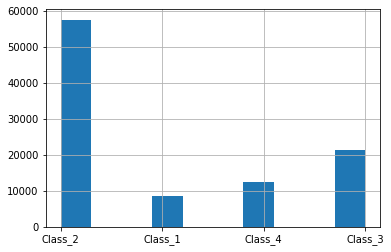

In [ ]:
y.hist();

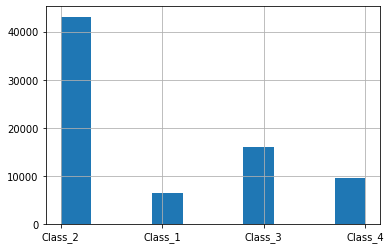

In [ ]:
y_train.hist()

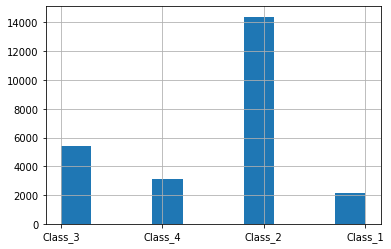

In [ ]:
y_test.hist()

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_resampled

array([[ 0,  0,  1, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ..., 13,  2,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  2,  0],
       [ 0,  0,  0, ...,  0,  0,  0]])

In [ ]:
y_resampled = pd.DataFrame(y_resampled)
y_resampled

,0
0,Class_2
1,Class_1
2,Class_1
3,Class_4
4,Class_2
...,...
229983,Class_4
229984,Class_4
229985,Class_4
229986,Class_4


In [ ]:
y_resample_count = y_resampled[0].value_counts()
y_resample_count

Class_2    57497
Class_4    57497
Class_3    57497
Class_1    57497
Name: 0, dtype: int64

In [ ]:
y_resample_count.keys().values

array(['Class_2', 'Class_4', 'Class_3', 'Class_1'], dtype=object)

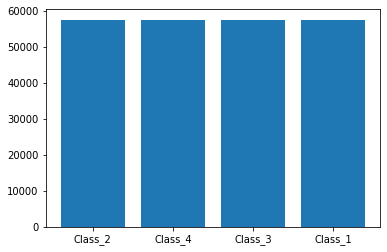

In [ ]:
plt.bar(y_resample_count.keys(), y_resample_count);

In [ ]:
X_resampled = pd.DataFrame(X_resampled)
X_resampled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,3,0,0,21,0,0,0,0,0,0
1,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,3,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,2,0,0,1,0,1,0,0,0,0,1,0,5,2,1,1,0,1,0,2,0,0,0,0,19,2,0,1,7,3,0,0,0,1,0,0,0,0,13,2,0
3,0,0,0,0,0,0,0,3,0,0,0,0,0,1,7,11,1,0,3,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,4,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,9,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229983,0,0,0,0,0,0,2,0,0,0,0,0,0,0,1,1,0,0,0,45,1,0,0,0,19,4,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0
229984,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,10,0,0,0,0,0,1,0,8,0,0,0,0,0,0,0,0,1,0,0
229985,0,0,0,1,0,0,0,2,2,0,1,1,0,0,0,0,0,0,0,2,2,0,0,0,0,0,8,0,1,0,0,0,0,11,0,0,1,1,9,0,0,1,0,0,0,0,0,0,0,0
229986,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,2,0,2,0,0,2,0,0,0,0,0,0,1,0,1,3,0,0,1,0,0,9,0,0,0,1,1,0,0,2,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_resampled = le.fit_transform(y_resampled)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
y_resampled

array([1, 0, 0, ..., 3, 3, 3])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test_new, y_train, y_test_new = train_test_split(X_resampled, y_resampled, random_state = 10)

In [ ]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
203900,0,0,0,0,2,0,0,0,0,2,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,2,0,0,6,0
206983,0,0,0,2,0,0,0,0,0,2,0,0,2,0,5,1,0,0,2,10,0,0,0,0,4,0,0,1,2,0,0,1,13,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0
156037,0,0,0,0,0,0,0,3,0,6,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,4,0,0,0,0
199417,0,0,0,0,0,0,0,0,0,3,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,4,0,0,1,1,0,1,0,0,0,21,0,0,0,0,0,0,0,0,0,0,1
84146,0,0,0,0,0,0,0,0,0,0,6,2,0,0,0,0,0,0,1,1,0,2,0,1,0,3,0,0,0,0,0,4,0,0,0,1,3,0,3,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105595,2,0,0,0,0,0,0,2,0,1,0,0,0,0,16,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,1,0,0,0,0,0,0,0,5,0,0,0,0
93553,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,3,0,0,0,8,25,0
181568,0,2,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4,0,0,0,0,1,0,0,0,0
94735,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,4,6,0,0,0,0,2,0,0,2,3


In [ ]:
y_test_new

array([3, 3, 0, ..., 2, 3, 0])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classfier_rf = RandomForestClassifier(random_state = 10)
classfier_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [ ]:
train_pred = classfier_rf.predict(X_train)
test_pred = classfier_rf.predict(X_test_new)

In [ ]:
# On train set
print(confusion_matrix(y_train,train_pred))
print("Accuracy: ", accuracy_score(y_train,train_pred)*100)

[[43190     0     0     0]
 [    0 43122     0     2]
 [    2     0 42879     0]
 [    0     0     0 43296]]
Accuracy:  99.99768103843098


In [ ]:
# On test set
print(confusion_matrix(y_test_new, test_pred))
print("Accuracy: ", accuracy_score(y_test_new, test_pred)*100)

[[14267    40     0     0]
 [   24 13125   969   255]
 [    4  1887 12689    36]
 [    0   351    34 13816]]
Accuracy:  93.73880376367462


<BarContainer object of 50 artists>

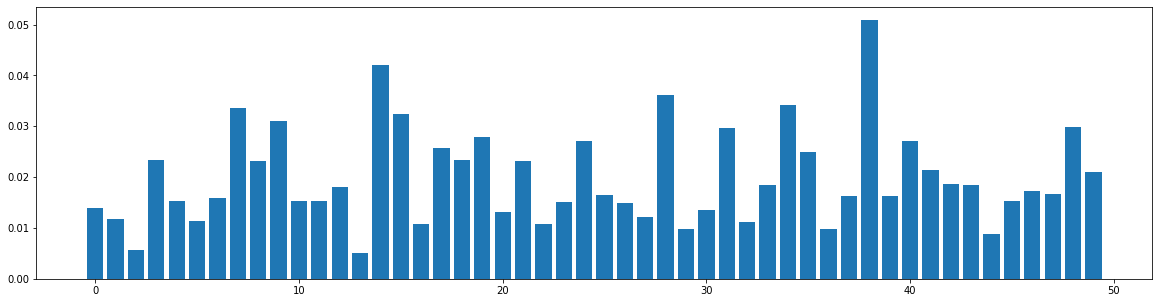

In [ ]:
importance = classfier_rf.feature_importances_
plt.figure(figsize=(20,5))
plt.bar([x for x in range(len(importance))], importance)

In [ ]:
features = np.concatenate((X_resampled.columns.values.reshape(len(X_resampled.columns),1),importance.reshape(len(importance),1)),axis=1)
features = pd.DataFrame(features, columns=['Feature','Score']).sort_values("Score")
features

,Feature,Score
13,13.0,0.005071
2,2.0,0.005721
44,44.0,0.008843
36,36.0,0.009808
29,29.0,0.009859
22,22.0,0.010691
16,16.0,0.010763
32,32.0,0.011142
5,5.0,0.011336
1,1.0,0.011763


In [ ]:
top_10 = features.iloc[-10:,:]['Feature'].values
top_10

array([19., 31., 48.,  9., 15.,  7., 34., 28., 14., 38.])

In [ ]:
least_40 = features.iloc[:40,:]['Feature'].values
least_40

array([13.,  2., 44., 36., 29., 22., 16., 32.,  5.,  1., 27., 20., 30.,
        0., 26., 23., 10.,  4., 45., 11.,  6., 39., 37., 25., 47., 46.,
       12., 33., 43., 42., 49., 41.,  8., 21., 18.,  3., 35., 17., 24.,
       40.])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
X_least_40 = pca.fit_transform(X_resampled[least_40])

In [ ]:
X_10 = X_resampled[top_10]
X_10['pca_least_40'] = X_least_40
X_10

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,19,31,48,9,15,7,34,28,14,38,pca_least_40
0,0,0,0,0,0,0,1,0,0,0,-0.539801
1,0,0,0,0,3,0,0,0,0,0,-0.706086
2,1,0,2,2,0,0,2,2,1,3,-0.460835
3,1,0,1,0,11,3,1,1,7,4,-0.737750
4,0,1,1,0,0,0,0,0,2,1,-0.720407
...,...,...,...,...,...,...,...,...,...,...,...
229983,45,0,2,0,1,0,1,2,1,0,-0.842182
229984,0,0,0,0,0,0,0,0,0,8,-0.651702
229985,2,0,0,0,0,2,0,1,0,9,-0.493267
229986,2,1,2,0,1,0,3,0,0,0,-0.725520


In [ ]:
y_resampled.size

229988

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_10, y_resampled, random_state = 10)

In [ ]:
X_train

,19,31,48,9,15,7,34,28,14,38,pca_least_40
203900,0,0,6,2,0,0,0,0,3,2,-0.711044
206983,10,1,0,2,1,0,0,2,5,0,-0.685148
156037,0,0,0,6,2,3,0,0,1,0,-0.710426
199417,0,1,0,3,0,0,1,4,1,21,-0.742062
84146,1,4,0,0,0,0,0,0,0,3,-0.727362
...,...,...,...,...,...,...,...,...,...,...,...
105595,0,0,0,1,0,2,0,0,16,0,-0.730424
93553,0,0,25,0,0,0,1,1,2,1,-0.685236
181568,0,0,0,0,0,0,0,0,2,0,-0.725731
94735,0,0,2,0,0,0,1,0,1,1,3.265661


In [ ]:
y_test

array([3, 3, 0, ..., 2, 3, 0])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classfier_rf = RandomForestClassifier(random_state = 10)
classfier_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [ ]:
train_pred = classfier_rf.predict(X_train)
test_pred = classfier_rf.predict(X_test)

In [ ]:
# On train set
print(confusion_matrix(y_train,train_pred))
print("Accuracy: ", accuracy_score(y_train,train_pred)*100)

[[43190     0     0     0]
 [    1 43121     0     2]
 [    2     0 42879     0]
 [    0     0     0 43296]]
Accuracy:  99.99710129803874


In [ ]:
# On test set
print(confusion_matrix(y_test, test_pred))
print("Accuracy: ", accuracy_score(y_test, test_pred)*100)

[[14267    31     5     4]
 [  496 10769  2109   999]
 [   88  1591 12770   167]
 [   17   297    61 13826]]
Accuracy:  89.79946779831991


top 10 mean

In [ ]:
X_10 = X_resampled[top_10]
X_10['mean_least_40'] = X_resampled[least_40].mean(axis = 1)
X_10

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,19,31,48,9,15,7,34,28,14,38,mean_least_40
0,0,0,0,0,0,0,1,0,0,0,0.825
1,0,0,0,0,3,0,0,0,0,0,0.200
2,1,0,2,2,0,0,2,2,1,3,1.300
3,1,0,1,0,11,3,1,1,7,4,0.150
4,0,1,1,0,0,0,0,0,2,1,0.300
...,...,...,...,...,...,...,...,...,...,...,...
229983,45,0,2,0,1,0,1,2,1,0,0.675
229984,0,0,0,0,0,0,0,0,0,8,0.475
229985,2,0,0,0,0,2,0,1,0,9,0.725
229986,2,1,2,0,1,0,3,0,0,0,0.475


In [ ]:
y_resampled.size

229988

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_10, y_resampled, random_state = 10)

In [ ]:
X_train

,19,31,48,9,15,7,34,28,14,38,mean_least_40
203900,0,0,6,2,0,0,0,0,3,2,0.150
206983,10,1,0,2,1,0,0,2,5,0,0.675
156037,0,0,0,6,2,3,0,0,1,0,0.225
199417,0,1,0,3,0,0,1,4,1,21,0.075
84146,1,4,0,0,0,0,0,0,0,3,0.500
...,...,...,...,...,...,...,...,...,...,...,...
105595,0,0,0,1,0,2,0,0,16,0,0.300
93553,0,0,25,0,0,0,1,1,2,1,0.400
181568,0,0,0,0,0,0,0,0,2,0,0.225
94735,0,0,2,0,0,0,1,0,1,1,0.525


In [ ]:
y_test

array([3, 3, 0, ..., 2, 3, 0])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classfier_rf = RandomForestClassifier(random_state = 10)
classfier_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [ ]:
train_pred = classfier_rf.predict(X_train)
test_pred = classfier_rf.predict(X_test)

In [ ]:
# On train set
print(confusion_matrix(y_train,train_pred))
print("Accuracy: ", accuracy_score(y_train,train_pred)*100)

[[42775    33   122   260]
 [  451 41406   538   729]
 [  475   205 41571   630]
 [  379    63   282 42572]]
Accuracy:  97.58422178548446


In [ ]:
# On test set
print(confusion_matrix(y_test, test_pred))
print("Accuracy: ", accuracy_score(y_test, test_pred)*100)

[[14079    58    65   105]
 [  624 10432  2143  1174]
 [  229  1656 12330   401]
 [  160   321   203 13517]]
Accuracy:  87.58370001913143


top 25

In [ ]:
top_25 = features.iloc[-25:,:]['Feature'].values
top_25

array([46., 12., 33., 43., 42., 49., 41.,  8., 21., 18.,  3., 35., 17.,
       24., 40., 19., 31., 48.,  9., 15.,  7., 34., 28., 14., 38.])

In [ ]:
least_25 = features.iloc[:25,:]['Feature'].values
least_25

array([13.,  2., 44., 36., 29., 22., 16., 32.,  5.,  1., 27., 20., 30.,
        0., 26., 23., 10.,  4., 45., 11.,  6., 39., 37., 25., 47.])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
X_least_25 = pca.fit_transform(X_resampled[least_25])

In [ ]:
X_25 = X_resampled[top_25]
X_25['pca_least_25'] = X_least_25
X_25

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,46,12,33,43,42,49,41,8,21,18,3,35,17,24,40,19,31,48,9,15,7,34,28,14,38,pca_least_25
0,0,0,0,21,0,0,0,0,0,0,0,0,6,0,3,0,0,0,0,0,0,1,0,0,0,-0.699104
1,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,3,0,0,0,0,0,-0.680187
2,0,1,19,0,1,0,0,0,5,0,0,0,0,1,0,1,0,2,2,0,0,2,2,1,3,-0.628162
3,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,1,0,11,3,1,1,7,4,-0.710174
4,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,1,0,0,0,0,0,2,1,-0.693692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229983,0,0,0,0,1,0,0,0,0,0,0,0,0,19,0,45,0,2,0,1,0,1,2,1,0,-0.725987
229984,0,0,0,0,0,0,0,0,0,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,8,-0.657622
229985,0,0,11,0,0,0,1,2,0,0,1,0,0,0,0,2,0,0,0,0,2,0,1,0,9,-0.618811
229986,0,1,1,0,0,0,0,0,2,0,1,0,0,2,9,2,1,2,0,1,0,3,0,0,0,-0.717268


In [ ]:
y_resampled.size

229988

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_25, y_resampled, random_state = 10)

In [ ]:
X_train

,46,12,33,43,42,49,41,8,21,18,3,35,17,24,40,19,31,48,9,15,7,34,28,14,38,pca_least_25
203900,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,6,2,0,0,0,0,3,2,-0.686698
206983,0,2,0,0,0,0,0,0,0,2,2,0,0,4,0,10,1,0,2,1,0,0,2,5,0,-0.661256
156037,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,6,2,3,0,0,1,0,-0.692006
199417,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,3,0,0,1,4,1,21,-0.714514
84146,0,0,0,0,1,0,0,0,2,1,0,1,0,0,0,1,4,0,0,0,0,0,0,0,3,-0.697328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105595,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,1,0,2,0,0,16,0,-0.709457
93553,0,0,0,3,0,0,0,0,0,1,0,1,0,2,0,0,0,25,0,0,0,1,1,2,1,-0.677895
181568,0,0,1,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,2,0,-0.712483
94735,0,0,0,0,0,3,0,0,0,0,1,0,0,0,6,0,0,2,0,0,0,1,0,1,1,3.279037


In [ ]:
y_test

array([3, 3, 0, ..., 2, 3, 0])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classfier_rf = RandomForestClassifier(random_state = 10, n_estimators= 50,n_jobs=-1)
classfier_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                       oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classfier_rf = RandomForestClassifier(random_state = 10, n_estimators= 500,n_jobs=-1)
classfier_rf.fit(X_train,y_train)

In [ ]:
train_pred = classfier_rf.predict(X_train)
test_pred = classfier_rf.predict(X_test)

In [ ]:
# On train set
print(confusion_matrix(y_train,train_pred))
print("Accuracy: ", accuracy_score(y_train, train_pred)*100)

[[43190     0     0     0]
 [    0 43122     0     2]
 [    2     0 42879     0]
 [    0     0     0 43296]]
Accuracy:  99.99768103843098


In [ ]:
# On test set
print(confusion_matrix(y_test, test_pred))
print("Accuracy: ", accuracy_score(y_test, test_pred)*100)

[[14267    36     1     3]
 [  122 12295  1527   429]
 [   19  1850 12684    63]
 [    0   355    30 13816]]
Accuracy:  92.2865540810825


XGboost TRY

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Create the random grid
random_grid = {'n_estimators': [500,600],
               'max_features': ['sqrt'],
               'max_depth': [50,100],
               'min_samples_split': [2,5,10],
               'min_samples_leaf':  [1, 2],
               'bootstrap': [True]}

In [ ]:
rf_random = RandomizedSearchCV(estimator = classfier_rf, param_distributions = random_grid,
                               n_iter = 100, cv = 3, verbose=1, random_state=10, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [ ]:
best_grid = rf_random.best_params_
best_grid

In [ ]:
classfier_rf = RandomForestClassifier(random_state = 10, n_estimators = 500, min_samples_split = 10,
 min_samples_leaf = 2, max_features = 'sqrt', max_depth = 50, bootstrap = True)
classfier_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [ ]:
train_pred = classfier_rf.predict(X_train)
test_pred = classfier_rf.predict(X_test)

In [ ]:
# On test set
print(confusion_matrix(y_test, test_pred))
print("Accuracy: ", accuracy_score(y_test, test_pred)*100)

[[14143   143     5    16]
 [   81 11899  1755   638]
 [   21  1862 12610   123]
 [    3   478    60 13660]]
Accuracy:  90.9821381985147
